# Topic : ANALYSIS OF POSSIBLE WAYS TO IMPROVE RETAIL SALES

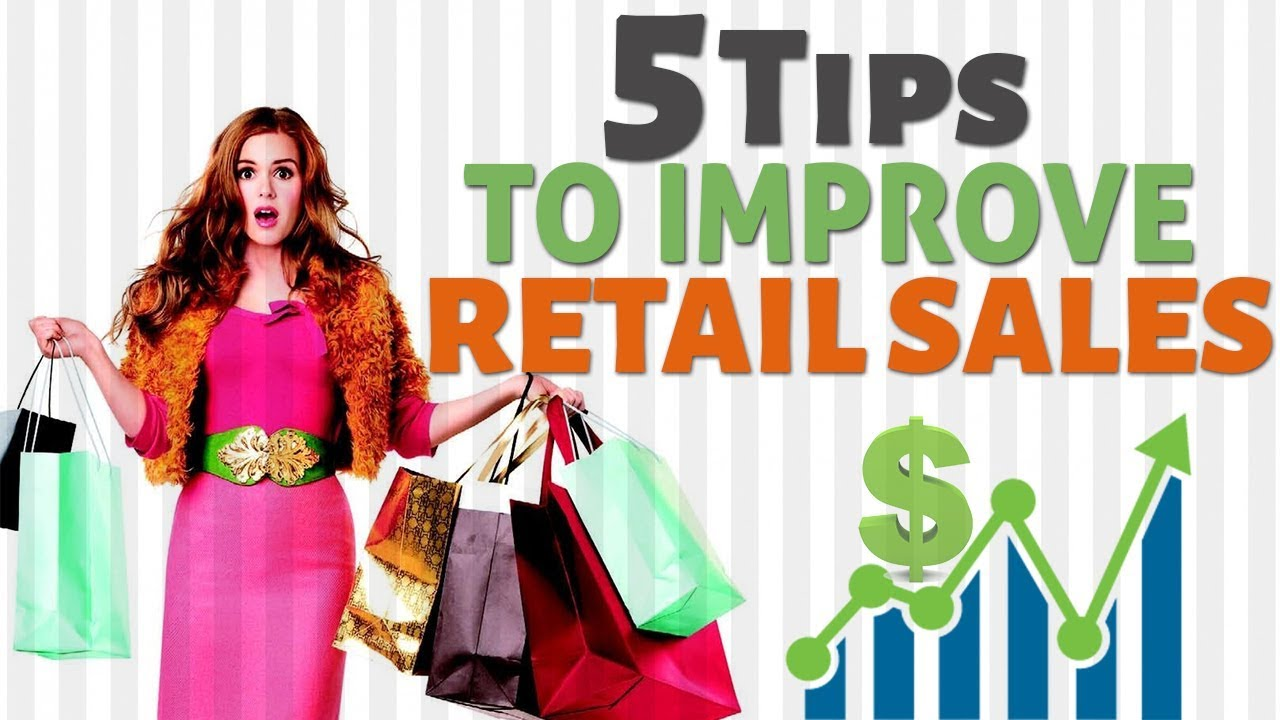

## Contents
1. [INTRODUCTION](#1.-Introduction)
       
      1.1 [Scope](#1.1-Scope)
      
      1.2 [Business_Problem](#1.2-Business_Problem)
      
      1.3 [Data_Library](#1.3-Data_Library)
      
      1.4 [Required_Libraries](#1.4-Required_Libraries)
      
      1.5 [User_Defined_functions](#1.5-User_Defined_functions)
      
      1.6 [load_the_data](#1.6-load_the_data)
      
      
2. [DATA_CLEANING](#2.-DATA_CLEANING)


3. [DATA_PREPROCESSING](#3.-DATA_PREPROCESSING)

# 1. INTRODUCTION

Retail sales involves the purchases of finished goods and services by  consumers and businesses. 
This dataset contains customers details, product Id and purchase cost.


# 1.1 Scope

The scope of the project is to predict possible ways to improve sales.
To find ways we convert the purchase cost into ranges. In future we can identify new customer is in which range we can offer them according
to the ranges to buy more. Lastly convert people into clusters.
Based on the clusters , we group a people so it helps to identify which group is more beneficial which we want to concentrate more to improve.

# 1.2 Business_Problem

The problem for retailers is that customer loyalty takes time and patience to build. Retail businesses also have to deal with a lot of
competition. At any one time, there is a brand out there marketing to your customers, convincing them they are worth spending money on. The higher the competition in the market, the harder it
is to retain customers. Retailers can craft innovative ways to appeal to customers and inspire loyalty.

# 1.3  Data_Library

In [1]:
lib = {'Variable'           : 'Definition',
       'User_ID'            : 'User ID of a individual customer',
       'Product_ID'         : 'Product ID of a product',
       'Gender'             : 'Sex of User',
       'Age'                : 'Age in bins',
       'Occupation'         : 'Occupation(Masked- This is a container category. Due to its scope, it should contain only subcategories)',
       'City_Category'      : 'Category of the City (A, B, C)',
       'Marital_Status'     : 'Marital Status',
    'Product_Category_1'    : 'Product Category (Masked)',
    'Product_Category_2'    : 'Product may belong to other categories also (Masked)',
    'Product_Category_3'    : 'Product may belong to other categories also (Masked)',
      'Purchase'            : 'Purchase Amount (Target Variable)',
'Stay_In_Current_City_Years': 'Number of years stay in current city'
 
       }

# 1.4 Required_Libraries

In [99]:
# import 'Pandas'  # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# import 'Numpy' # linear algebra
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
from scipy.stats import shapiro , pearsonr

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [100]:
import seaborn as sns

# 1.5 User_Defined_functions

In [101]:
def load_data(x):
    df = pd.read_csv('x')
    return df



def miss_val(x):
    miss_val =[]
    for i in x.columns:
        for j in x[i]:
            if x[x[i].isna()].shape[0]>=1:
                miss_val.extend(x[x[i].isna()].index)
    return miss_val

            
            
def univariate_outlier(x):
    q1 = df[x].describe().T["25%"]
    q3 = df[x].describe().T["75%"]
    iqr = q3-q1
    inner = q1 -1.5*iqr
    outer = q3 +1.5*iqr
    out=[]
    for i,j in df[x].iteritems():
        if inner<j<outer:
            pass
        else:
            out.append(j)
    return out

    
    
def feature_box_kde_normality(x):
    normality_test(df[x])
    out=univariate_outlier(x)
    if len(out)==0:
        print(f"There is no outlier in {x}")
    else:
        print("Outlier :",out)
    f,(ax1,ax2) = plt.subplots(1,2,figsize=[15,3])
    sns.boxplot(data=df,x=x,ax=ax1)
    sns.kdeplot(data=df,x=x,ax=ax2)
    
def normality_test(x):
    s,p = stats.shapiro(x)
    print(f"The statistic value is {s} with p-value : {p}")
    if p>0.05:
        print(f"{x.name} is normally distributed")
    else:
        print(f"{x.name} is not normally distributed")
        
def missing_values(df):
    for i in df.columns:
        df[i].fillna(df[i].mode()[0],inplace=True)
        
def feature_analysis(x):
    a = df[x].unique()
    d = df[x].value_counts()
    b = df[x].value_counts(normalize = True)*100
    c = df[x].isna().sum()
    print('unique_values:', '\n', a, '\n', 'value_counts:','\n', d, '\n','proportion of value:', '\n', b, '\n','count of nan values:', c)
    
def cat(x):
    sns.countplot(data= df, x = col)
    plt.show()
    print(df1[x]. value_counts().head(1))

def high_frequency(x):
        # set the figure size
        plt.rcParams["figure.figsize"] = [10,8]
        # plot the bar plot
        ax= sns.countplot(x= df[x], data = df)
        # rotate the x-axis labels
        ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
# display the values on the bar plot
# annotate(): it is use to emphasize specific observations
# get_height(): return the height of the bar 
# (p.get_x() + p.get_width() / 2., p.get_height()): it is use to place the text on the top
# get_width() and get_x(): return the value of the x-axis
# ha = 'center': used for horizontal alignment
#  xytext(): the text appear at the location given by xytext
# textcoords: specify an offset (in points) from the xy value
        for p in ax.patches:           # use for loop to annotate each bin of the plot
            ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   xytext = (0, 15), textcoords = 'offset points')
        print('the variable with more frequency is', df[x].mode()[0])

    
def comparison_plot(x,y):
    fig,(axis1) = plt.subplots(1,1,figsize=(15,10))
    sns.countplot(x=df[x], hue= y ,data=df, ax = axis1)
    plt.show()
    
def multi_comparison (x,y,z):
    fig, (axis1)  = plt.subplots(1, 1,figsize=(20,10))
    sns.barplot(x=df[x], y= df[y], hue=df[z], data=df, ax=axis1)
    

def cat_dtype_change(x):
    df[x]= df[x].astype('object')
    df[x].info()
    
    
def train_test(x,y):
    x_encoded = pd.get_dummies(x, drop_first=True)
    scaler = StandardScaler()
    scaler.fit(x_encoded)
    x1 = scaler.fit_transform(x_encoded)
    x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=45)
    
def model_build(x_train, y_train):
    Logit_Model = LogisticRegression()
    Logit_Model.fit(x_train,y_train)
    decision_tree = DecisionTreeClassifier(criterion = 'entropy')
    decision_tree.fit(x_train,y_train)
    random_forest = RandomForestClassifier(n_estimators=10)
    random_forest.fit(x_train, y_train)
    from sklearn.ensemble import AdaBoostClassifier
    ad= AdaBoostClassifier() #creation of the object
    ad.fit(xtrain, ytrain)
    from sklearn.multiclass import OneVsRestClassifier
    from xgboost import XGBClassifier
    from sklearn.preprocessing import MultiLabelBinarizer
    clf = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=4))
    mlb = MultiLabelBinarizer()
    y_train = mlb.fit_transform(y_train)
    clf.fit(x_train, y_train)
    from sklearn import svm
    svc = svm.SVC(kernel='linear', C=1,gamma=0).fit(x_train, y_train)
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)

    models = {'logis': Logit_Model, 'decision tree': decision_tree, 'random_forest': random_forest, 
               'Adaboost': ad, 'XG Boost': clf, 'SVM': svc, 'Naive Bayes': gnb }
    return models

def results(x_train, x_test, y_train, y_test, models):
    for model_name , model in models.items():
        train_pred = model.predict(x_train)
        print('training results', model_name)
        print(classification_report(y_train, train_pred))
        cm= confusion_matrix(y_train, train_pred)
        print('Confusion matrix')
        print('/n')
        print(cm)
    
        print('Test Results')
        test_pred = model.predict(x_test)
        print(classification_report(y_test, test_pred))
        cm =confusion_matrix(y_test, test_pred)
        print('Confusion matrix')
        print(cm)


        print("---------------------------------------------------")
    

# 1.6 load_the_data

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.shape

(550068, 12)

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
# Taking the copy of the dataset
df1 = df.copy()

In [10]:
# Info function gives the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
# To find the duplicated values in the dataset we can find using "duplicate function" 
df[df.duplicated()].shape

(0, 12)

#  2.DATA_CLEANING

# FREQUENCY ENCODER

In [12]:
df['Product_ID'].value_counts().head()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: Product_ID, dtype: int64

In [13]:
df1['product_fre'] = df1['Product_ID'].map(df1['Product_ID'].value_counts())
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product_fre
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,227
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200,581
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,102
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,NaN,1057,341
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,203


In [15]:
df1['product_fre'].value_counts().head()

785     3140
1406    2812
1152    2304
436     2180
537     2148
Name: product_fre, dtype: int64

# MISSING VALUES OR NAN VALUES 

In [16]:
# isna function gives the missing values in the dataset
df1.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
product_fre                        0
dtype: int64

In [17]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product_fre
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,227
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200,581
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,102
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,NaN,1057,341
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,203


In [18]:
label_encoder = LabelEncoder()

In [19]:
df1['Gender']= label_encoder.fit_transform(df['Gender'])

In [20]:
df1['Age']= label_encoder.fit_transform(df['Age'])

In [21]:
df1['City_Category']= label_encoder.fit_transform(df['City_Category'])

In [22]:
df1['Stay_In_Current_City_Years']= label_encoder.fit_transform(df['Stay_In_Current_City_Years'])

In [23]:
df1 = df1.drop(['User_ID', 'Product_ID'],axis = 1)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int32  
 1   Age                         550068 non-null  int32  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  int32  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  product_fre                 550068 non-null  int64  
dtypes: float64(2), int32(4), int64(5)
memory usage: 37.8 MB


# METHOD -1

In [25]:
from fancyimpute import IterativeImputer

In [26]:
df_imputer = df1.copy(deep= True)

In [27]:
df_imputer.isna().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
product_fre                        0
dtype: int64

In [28]:
iterative= IterativeImputer()

In [29]:
df_imputer.iloc[:,:] = iterative.fit_transform(df_imputer)

In [30]:
df_imputer.isna().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
product_fre                   0
dtype: int64

In [32]:
df_imputer.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product_fre
0,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,3.000000,8.681195,13.198647,8370.000000,227.000000
1,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,1.000000,6.000000,14.000000,15200.000000,581.000000
2,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,12.000000,15.733229,16.020379,1422.000000,102.000000
3,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,12.000000,14.000000,14.945364,1057.000000,341.000000
4,1.000000,6.000000,16.000000,2.000000,4.000000,0.000000,8.000000,13.139734,16.064286,7969.000000,203.000000


In [33]:
df_imputer.to_csv('C:\\Users\\BIS\\Desktop\\df_imputer.csv', index = False)

# METHOD - 2 MICE 

In [34]:
import miceforest as mf

In [35]:
df_mice = df1.copy()

In [36]:
mice_imp= mf.ImputationKernel(df_mice,
                             datasets = 5,
                             save_all_iterations=True,
                             random_state=123)
# Run the mice algorithm for 6 iterations
mice_imp.mice(5)

In [38]:
# to see the imputed different datasets using complete data
mice_imp.complete_data(4)

In [39]:
# combine all different datasets into one final results

df_mice= pd.concat([mice_imp.complete_data(i) for i in range(5)]).groupby(level=0).median()


In [42]:
df_mice.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product fre
0,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,3.000000,4.000000,12.000000,8370.000000,0.000413
1,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,1.000000,6.000000,14.000000,15200.000000,0.001056
2,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,12.000000,15.000000,16.000000,1422.000000,0.000185
3,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,12.000000,14.000000,16.000000,1057.000000,0.000620
4,1.000000,6.000000,16.000000,2.000000,4.000000,0.000000,8.000000,16.000000,17.000000,7969.000000,0.000369


In [43]:
 # Taking the copy of the dataset 
df_mice.to_csv('C:\\Users\\BIS\\Desktop\\df_mice.csv', index = False)


# METHOD-3 RANDOM FOREST

In [44]:
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [45]:
random_for_imp = df1.copy()

In [46]:
imputer = MissForest() #miss forest
X_imputed = imputer.fit_transform(random_for_imp)
X_imputed = pd.DataFrame(X_imputed, columns = random_for_imp.columns).round(1)

In [47]:
df_rf = X_imputed.copy()

In [49]:
df_rf.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product fre
0,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,3.000000,4.000000,5.000000,8370.000000,0.000000
1,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,1.000000,6.000000,14.000000,15200.000000,0.000000
2,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,12.000000,16.400000,16.500000,1422.000000,0.000000
3,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,12.000000,14.000000,16.000000,1057.000000,0.000000
4,1.000000,6.000000,16.000000,2.000000,4.000000,0.000000,8.000000,14.000000,17.000000,7969.000000,0.000000


In [50]:
df_rf.to_csv('C:\\Users\\BIS\\Desktop\\df_ran_for.csv', index = False)

In [26]:
df_rf.describe()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product fre
count,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000
mean,0.752910,2.496802,8.079300,1.042671,1.858247,0.409777,5.366196,10.905698,14.679420,9275.392180,0.000000
std,0.431320,1.352736,6.522206,0.759879,1.288790,0.491793,3.878160,4.887728,3.263479,4843.672299,0.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.000000
25%,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,8.000000,14.000000,5929.250000,0.000000
50%,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,13.000000,16.000000,8027.400000,0.000000
75%,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,15.000000,17.000000,12270.000000,0.000000
max,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,0.000000


# OUTLIERS

# Target column

In [29]:
# find the summary statistics of the sales
df_rf['Purchase'].describe()

count   783667.000000
mean      9275.392180
std       4843.672299
min         12.000000
25%       5929.250000
50%       8027.400000
75%      12270.000000
max      23961.000000
Name: Purchase, dtype: float64

#INTERPRETATION : We notice that there is a big difference between the Q3 (12270.000000) and the maximum value (23961.000000)



<AxesSubplot:xlabel='Purchase'>

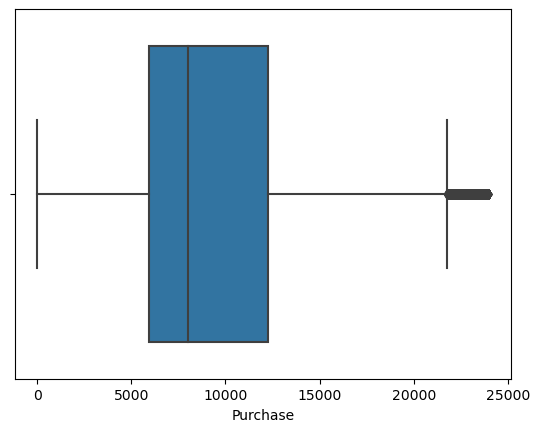

In [30]:
sns.boxplot(df_rf['Purchase'])

# 1.Normality check     

# use for skewness test

# we use shapiro test to check normality of the samples/data.

In [31]:
from scipy import stats

In [32]:
## Hypothesis Formation

# Null Hypothesis : Data is normal/ skew =0
 
# Alternate Hypothesis : Data is not normal/skew != 0

## perform shapiro test

In [33]:
normality_test(df_rf['Purchase'])

The statistic value is 0.9558077454566956 with p-value : 0.0
Purchase is not normally distributed


# From the result it shows that target column is not normally distributed

In [34]:
df_rf.isna().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
product fre                   0
dtype: int64

In [35]:
df_rf['Purchase'] = df_rf['Purchase'].astype('int')

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

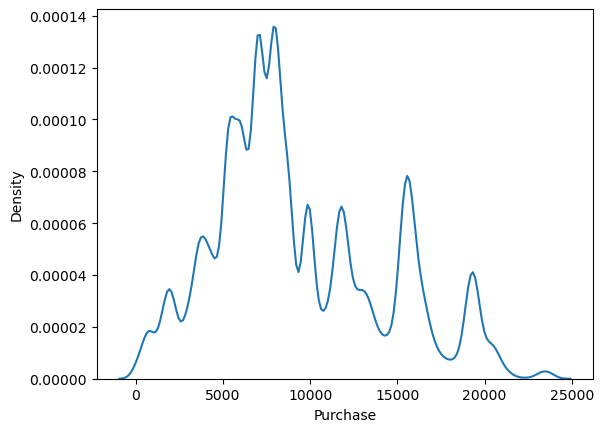

In [38]:
sns.kdeplot(df_rf['Purchase'])

A Boxplot can be used to visualize the presence of outliers in the data. In boxplot, the observation will be an outlier, if it is outside the specific range (1.5 times IQR above the third quartile and below the first quartile)

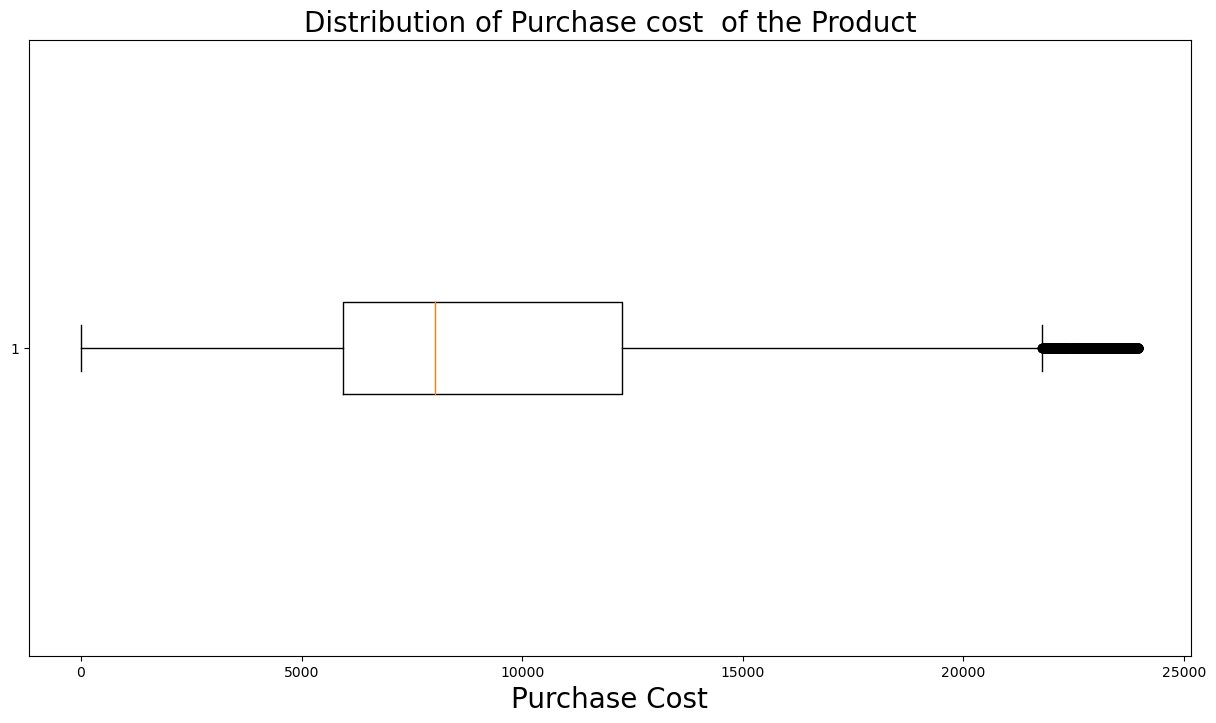

In [39]:
# plot the boxplot to visualize the outliers

# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# plot the horizontal boxplot using 'vert = False'
# ax: create an axes object in the figure
ax = plt.boxplot(df_rf['Purchase'], vert = False)

# set the title
plt.title("Distribution of Purchase cost  of the Product", fontsize=20)

# set the label for x-axis
plt.xlabel("Purchase Cost", fontsize=20)

# display the plot
plt.show()

# For this outliers are good because in this problem when people are buying high cost this is so useful for the business

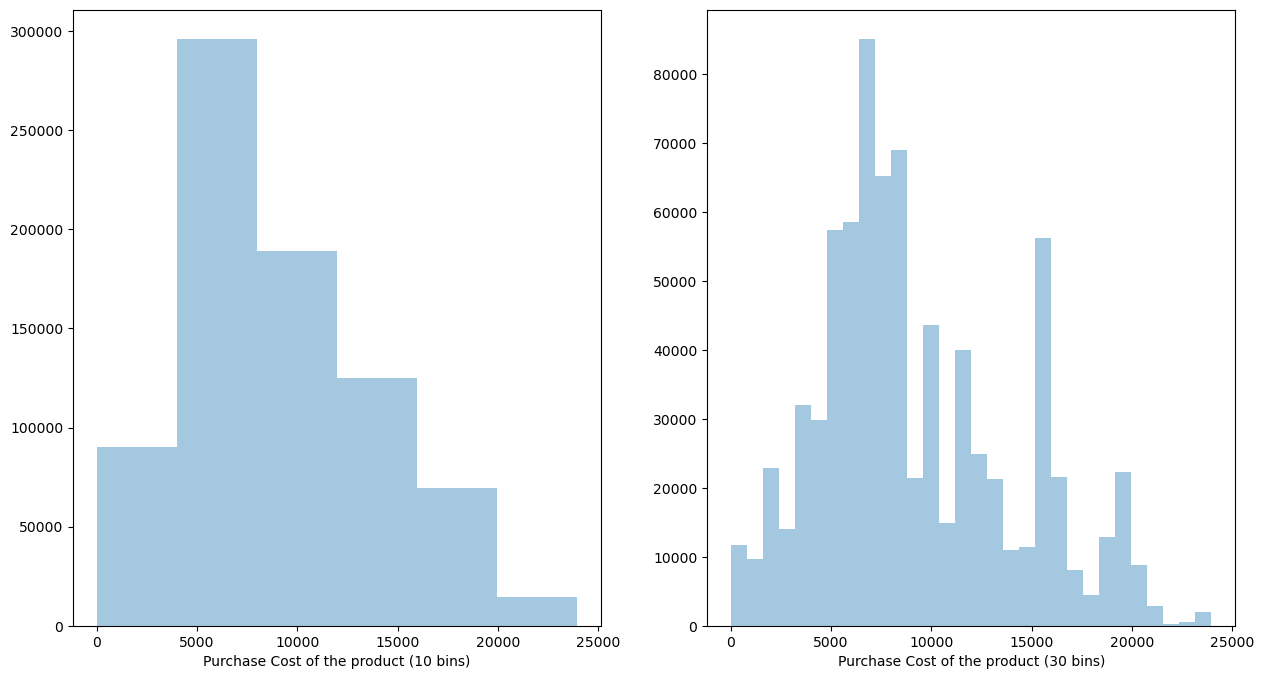

In [74]:
# create two plots in single figure
# we define two axes by passing the value 2 to the subplot function
fig, axes = plt.subplots(1,2, figsize=(15,8))

# create a histogram with 4 bins
# 'axlabel': add the label
# 'kde=False': Whether to plot or not a gaussian kernel density estimator
# ax = axes: axes object to draw plot
# we use axes[0] to use the first axes for plotting
sns.distplot(df_rf['Purchase'], bins=6, kde=False, ax = axes[0], axlabel='Purchase Cost of the product (10 bins)')

# create a histogram with 30 bins
# we use axes[1] to use the second axes for plotting
sns.distplot(df_rf['Purchase'], bins=30, kde=False, ax = axes[1], axlabel='Purchase Cost of the product (30 bins)')

# show the plot
plt.show()

Interpretation: We notice from the histogram on the left that the number of bins is too less (bins = 10) that does not allow the underlying pattern of the data to be easily observed. On the other hand, with the histogram on the right, where the number of bins is more (bins = 30), we can observe that the Purchase cost are positively skewed.

# Plot the mean, median on the histogram so we can make a comparison between the statistics¶


In [ ]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# plot histogram
df_rf['Purchase'].hist()

# calculate the mean
mean = df_rf['Purchase'].mean()

# calculate the median
median = df_rf['Purchase'].median()

# plot the line for mean
plt.axvline(mean, color='red',linestyle='--')

# plot the line for median
plt.axvline(median, color='orange',linestyle='dotted')

# add the value of the mean in the plot
plt.text(10000,25000, 'MEAN'+' '+ str(round(mean,2)))

# add the value of the median in the plot
plt.text(5000,25000, 'MEDIAN'+' '+ str(round(median,2)))

# set label for y-axis
plt.ylabel("Frequency", fontsize=20)

# set label for x-axis
plt.xlabel("Purchase Cost of the Product", fontsize=20)

# set title
plt.title("Histogram for Purchase Cost of the Product", fontsize=20)

# show plot
plt.show()

# Interpretation: 
Here, the red line represents the mean, an orange line represents the median. It can be observed that mean is highest among the three measures of central tendency, which tells us that  some of the values are spread more than the average value.

In [51]:
# 3rd quartile (75%)
upper_quartile = df_rf['Purchase'].quantile(0.75) 

# 1st quartile (25%)
lower_quartile = df_rf['Purchase'].quantile(0.25) 

# calculate inter-quartile range
iqr = upper_quartile - lower_quartile

# print the value of iqr
print("Inter quartile range is:",iqr)

# calculate the value of upper wisker
upper_whisker = df_rf['Purchase'][df_rf['Purchase']<= upper_quartile+1.5*iqr].max()

# print the value of upper whisker
print("Upper wisker is:",upper_whisker )

# calculate the value of lower whisker 
lower_whisker = df_rf['Purchase'][df_rf['Purchase']>= lower_quartile-1.5*iqr].min()

# print the value of lower whisker
print("Lower wisker is:",lower_whisker )

Inter quartile range is: 6231.0
Upper wisker is: 21399.0
Lower wisker is: 12.0


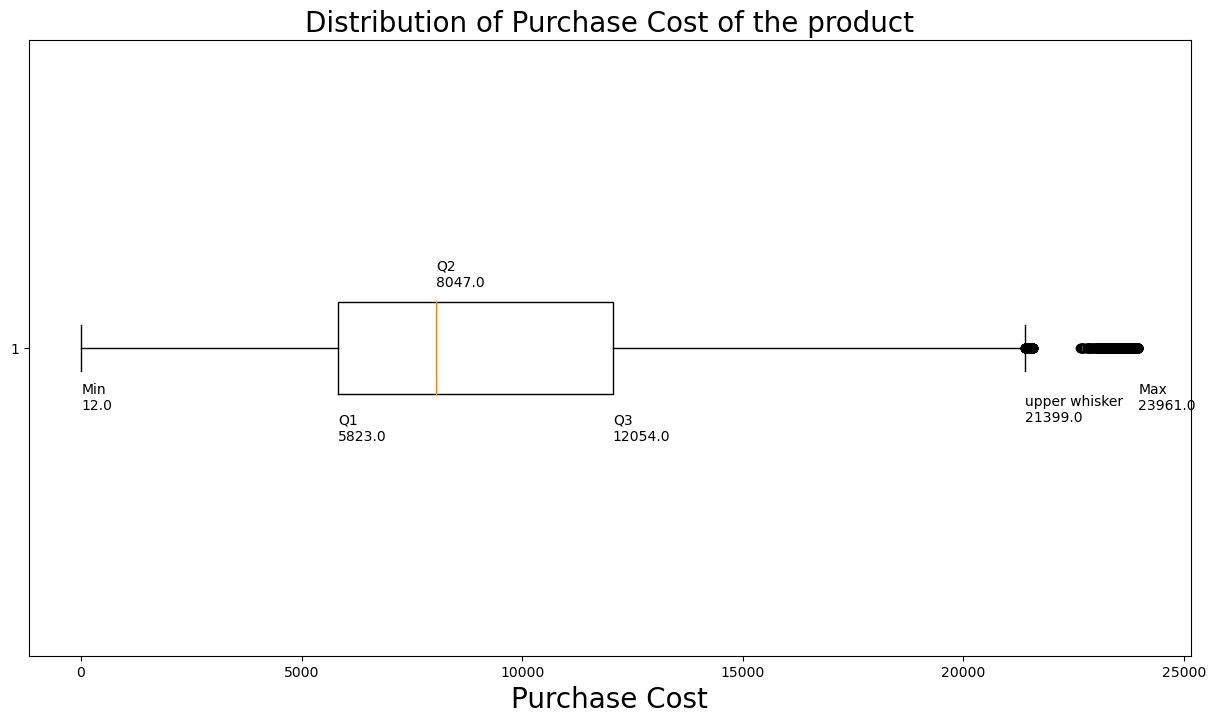

In [52]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# by default 'vert = True' returns a vertical boxplot
# plot the horizontal boxplot using 'vert = False'
plt.boxplot(df_rf['Purchase'], vert = False)

# plot the third quartile
# x: co-ordinates of the x-axis
# y: co-ordinates of the y-axis
# s: text
plt.text(x=df_rf['Purchase'].quantile(0.75) , y=0.85, s = "Q3\n"+ str(round(df_rf['Purchase'].quantile(0.75),2)))

# add the value of median in the plot
plt.text(x=df_rf['Purchase'].quantile(0.50) , y=1.1, s= "Q2\n"+ str(round(df_rf['Purchase'].quantile(0.50),2)))

# add the value of first quartile in the plot
plt.text(x=df_rf['Purchase'].quantile(0.25) , y=0.85, s="Q1\n"+ str(round(df_rf['Purchase'].quantile(0.25), 2)))

# add minimum value of the variable in the plot 
plt.text(x=df_rf['Purchase'].min(), y=0.9, s="Min\n"+ str(round(df_rf['Purchase'].min(), 2)))

# add the maximum value of the variable in the plot
plt.text(x=df_rf['Purchase'].max(), y=0.9, s="Max\n"+ str(round(df_rf['Purchase'].max(), 2)))

# add the value of the upper whisker in the plot
plt.text(x=upper_whisker, y=0.88, s='upper whisker\n'+ str(round(upper_whisker, 2)))

# set the title
plt.title("Distribution of Purchase Cost of the product", fontsize=20)

# set the label for x-axis
plt.xlabel("Purchase Cost", fontsize=20)

# display the plot
plt.show()

# Interpretation:
Note that this chart displays purchase cost of the product on the x-axis. The values above the upper whisker are the outliers.

# Cumulative Distribution: 
     Cumulative distribution function is used to describe the distribution of a variable. This distribution can be defined for discrete as well as a continuous variable.



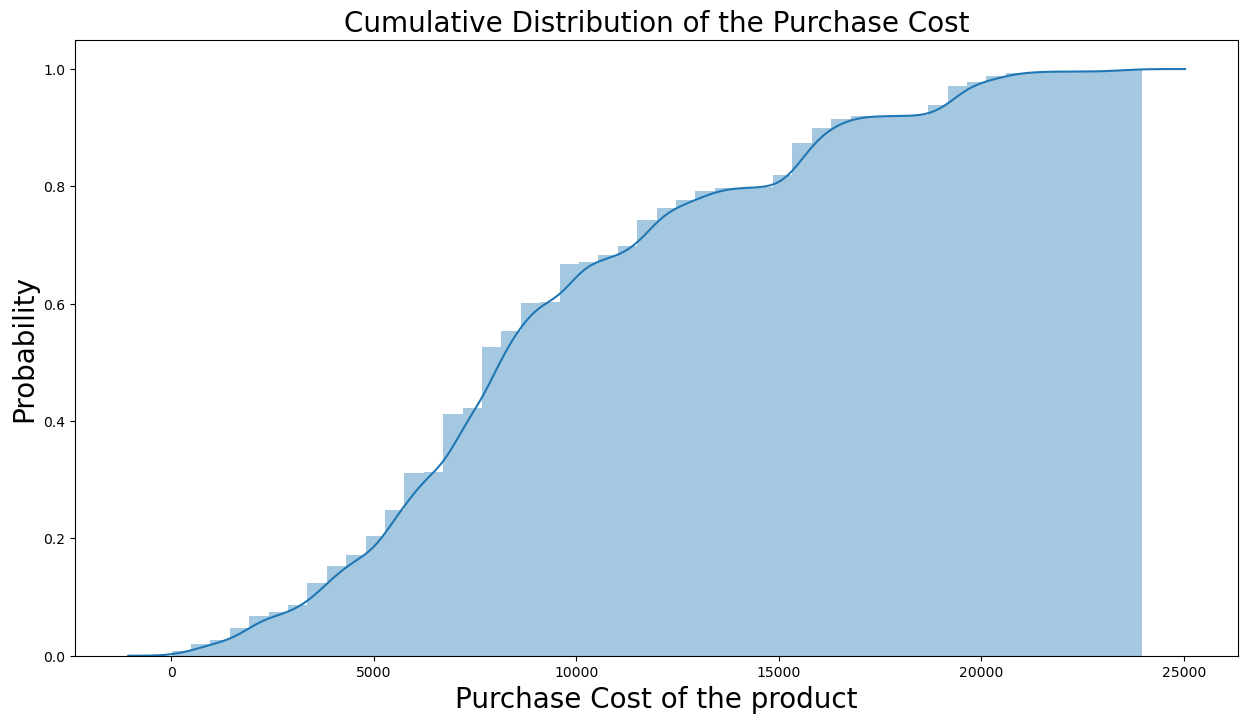

In [53]:
# 'cumulative=True' in 'kde_kws' returns the cumulative kernel density estimator
# 'cumulative=True' in 'hist_kws' returns the cumulative histogram
# ax: create an axes object in the figure
ax = sns.distplot(df_rf['Purchase'], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

# set the label for y-axis
ax.set_ylabel('Probability', fontsize=20)

# set the label for x-axis
ax.set_xlabel('Purchase Cost of the product', fontsize=20)

# set the title
plt.title('Cumulative Distribution of the Purchase Cost', fontsize=20)

# display the plot
plt.show()


Interpretation: It is frequency distribution of the product sales represented cumulatively. Suppose we want to know what is the probability of sales under 15000. So the plot shows the probability of the sales below 15000 would be in between 70 to 80 percent.

# convert purchase column into ranges 

In [69]:
ranges = {
    'Range 1': df_rf['Purchase'].between(0, 4000),
    'Range 2': df_rf['Purchase'].between(4000, 8000),
    'Range 3': df_rf['Purchase'].between(8000, 12000),

    'Range 4': df_rf['Purchase'].between(12000, 16000),
    'Range 5': df_rf['Purchase'].between(16000, 20000),
    'Range 6': df_rf['Purchase'].between(20000, 24000)
}
df_rf['Purchase_cat'] = np.select(ranges.values(), ranges.keys())

In [70]:
df_rf.Purchase_cat.unique()

array(['Range 3', 'Range 4', 'Range 1', 'Range 2', 'Range 5', 'Range 6'],
      dtype=object)

In [ ]:
# TRAIN TEST SPLIT

# CLUSTERING

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt


In [71]:
clustering = df_rf

In [72]:
clustering.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product fre,Purchase_cat,clus label
0,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,3.000000,5.000000,12.000000,8370,0.000000,Range 3,1
1,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,1.000000,6.000000,14.000000,15200,0.000000,Range 4,1
2,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,12.000000,14.000000,16.500000,1422,0.000000,Range 1,1
3,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,12.000000,14.000000,16.000000,1057,0.000000,Range 1,0
4,1.000000,6.000000,16.000000,2.000000,4.000000,0.000000,8.000000,16.000000,17.000000,7969,0.000000,Range 2,4


In [56]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for k in list(K):
    kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(clustering)
    cost.append(kmode.cost_)
      

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5587564.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 5587564.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 5587564.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 5587564.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 5587564.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 215006, cost: 5156558.0
Run 1, iteration: 2/100, moves: 5, cost: 5156558.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 121428, cost: 5226152.0


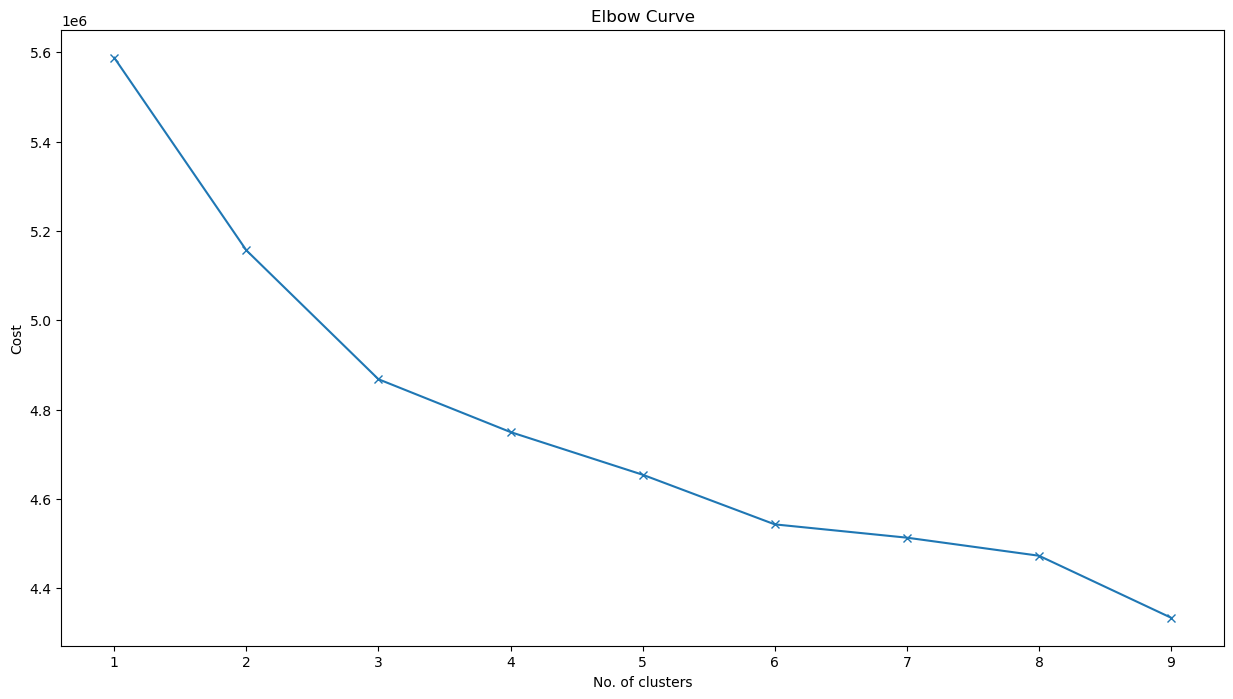

In [59]:
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

In [61]:
kmode = KModes(n_clusters=6, init = "random", n_init = 5, verbose=1)
clus= kmode.fit_predict(clustering)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 229497, cost: 4788323.0
Run 1, iteration: 2/100, moves: 33544, cost: 4788323.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 235711, cost: 4601694.0
Run 2, iteration: 2/100, moves: 53, cost: 4601694.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 281794, cost: 4689709.0
Run 3, iteration: 2/100, moves: 78760, cost: 4648910.0
Run 3, iteration: 3/100, moves: 67854, cost: 4626635.0
Run 3, iteration: 4/100, moves: 32523, cost: 4626635.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 268375, cost: 4577908.0
Run 4, iteration: 2/100, moves: 40089, cost: 4577908.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 338767, cost: 459

In [62]:
clustering['clus label']= clus

In [63]:
clustering.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product fre,Purchase_cat,clus label
0,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,3.000000,5.000000,12.000000,8370,0.000000,Range 2,1
1,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,1.000000,6.000000,14.000000,15200,0.000000,Range 4,1
2,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,12.000000,14.000000,16.500000,1422,0.000000,Range 1,1
3,0.000000,0.000000,10.000000,0.000000,2.000000,0.000000,12.000000,14.000000,16.000000,1057,0.000000,Range 1,0
4,1.000000,6.000000,16.000000,2.000000,4.000000,0.000000,8.000000,16.000000,17.000000,7969,0.000000,Range 2,4


In [62]:
clustering.shape

(550068, 13)

In [57]:
clustering[clustering['clus label']==0].head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product fre,Purchase_cat,clus label
10,1.000000,2.000000,20.000000,0.000000,1.000000,1.000000,5.000000,11.000000,12.000000,5254,0.000000,Range 2,0
18,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,16.000000,11788,0.000000,Range 3,0
19,1.000000,2.000000,12.000000,2.000000,4.000000,1.000000,1.000000,5.000000,15.000000,19614,0.000000,Range 5,0
20,1.000000,2.000000,12.000000,2.000000,4.000000,1.000000,5.000000,14.000000,17.000000,8584,0.000000,Range 3,0
22,1.000000,2.000000,12.000000,2.000000,4.000000,1.000000,8.000000,13.000000,16.000000,9743,0.000000,Range 3,0
24,1.000000,2.000000,12.000000,2.000000,4.000000,1.000000,1.000000,8.000000,14.000000,11927,0.000000,Range 3,0
27,1.000000,2.000000,17.000000,2.000000,0.000000,0.000000,5.000000,14.000000,16.000000,6973,0.000000,Range 2,0
29,0.000000,3.000000,1.000000,1.000000,4.000000,1.000000,2.000000,4.000000,8.000000,16352,0.000000,Range 5,0
30,0.000000,3.000000,1.000000,1.000000,4.000000,1.000000,5.000000,11.000000,12.000000,8886,0.000000,Range 3,0
31,0.000000,3.000000,1.000000,1.000000,4.000000,1.000000,8.000000,14.000000,17.000000,5875,0.000000,Range 2,0


``Interpretation``

         1. Look into the clustering labels and our purchase catagory column, according to the Clustering Range 2,3,5 are all comes under 
     
        same category. So they can able to purchase upto 20000 rupees according to the clustering.
        
        2. But they purchase for the low amount of sales. We have to give some offers or discounts to encourge those kind of people to purchase 
        more.
        
        

In [75]:
clustering.to_csv('C:\\Users\\BIS\\Desktop\\clus_sales.csv', index = False)

In [ ]:
clustering['Purchase_cat']= purchase_cat

# Stratified Sampling
     Stratified Sampling is a sampling technique used to obtain samples that best represent the population. It reduces bias in selecting samples by dividing the population into homogeneous subgroups called strata, and randomly sampling data from each stratum(singular form of strata). 

In [68]:
clus= clustering.groupby('clus label').apply(lambda x: x.sample(frac=0.5))

In [72]:
clus.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'product fre',
       'Purchase_cat', 'clus label'],
      dtype='object')

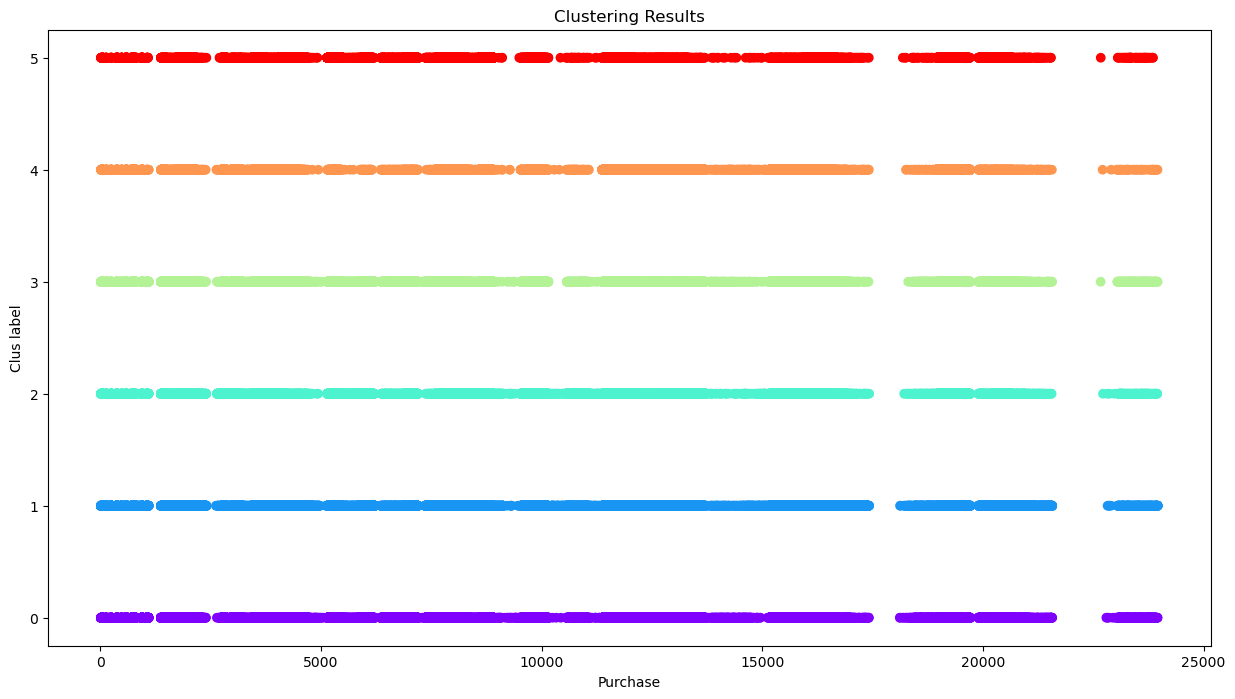

In [95]:
plt.scatter(clus['Purchase'],y= clus['clus label'] ,c=clus['clus label'], cmap='rainbow')
plt.xlabel('Purchase')
plt.ylabel('Clus label')
plt.title('Clustering Results')
plt.show()